<center> <img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> Aranzazú Rendón Gómez </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Sep 2022 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/Aranzazu-R/Lab1AranzazuR.git'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Lab 1 </font> <br> <br> <font color= #555555> <font size = 5> Inversión Activa vs Inversión Pasiva  </font>

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> <font size = 6>0. Librerías y dependencias </font>

## <font color= #6B6B6B> Python Packages </font> <font color= #555555>

<font color= #6B6B6B>
Para el funcionamiento de este código, es necesario contar con las siguientes librerias instaladas: 

>- pandas
>- numpy
>- jupyter
>- scipy 
>- glob
>- yfinance 
>- os
>- scipy.optimize
>- matplotlib 
</font>

## <font color= #6B6B6B> Files Dependencies </font> 

<font color= #6B6B6B>
De igual manera, se necesita contar con los archivos en csv, contenidos en la carpeta files del repositorio: 
        
> - files/precios.csv : Precios históricos
    
</font>

<font color= #6B6B6B>
Los siguientes archivos, los cuales se encuentran en el repositorio del proyecto, contienen el código trabajado durante el laboratorio y son indispensables para reflejar los resultados:
    </font> 

In [1]:
import data as dt
import functions as fun
import visualizations as vs

[*********************100%***********************]  28 of 28 completed
[*********************100%***********************]  28 of 28 completed


<font color= #6B6B6B> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  En este trabajo se llevara acabo un análisis comparativo entre dos estrategias de inverión, para esto, se realizará un experimento donde se invertirá un capital de 1 millón de pesos en el índice NAFTRAC, el cual es un conjunto de las 31 mayores empresas que cotizan en las bolsas de México con dos estrategias distintas, la pasiva y la activa durante el periodo entre 31-01-2020 y 29-07-2022.
    
<font color= #6B6B6B> <font size = 3>
La inversión pasiva se realizará invirtiendo el capital en los activos que estuvieron presentes en el índice NAFTRAC, durante los 31 periodos que se contemplaron, se utilizarán los mismos pesos que contempla el NAFTRAC para el primer périodo y se mantendrán durante todo el ejercicio.

Por otro lado, la inversión activa se realizará igualmente partiendo con el capital, pero se utilizarán los pesos de un portafolio eficiente realizado maximizando el Sharpe, y se llevara a cabo un rebalanceo mes con mes según los movimientos del precio, para esto, las condiciones son las siguientes:
</font>
>- Aumentar la posición en 2.5%, si el precio del activo aumento mínimo en un 5%.
>- Disminuír la posición en 2.5%, si el precio del activo disminuyó mínimo en un 5%.

<font color= #6B6B6B> <font size = 3>
Para ambos casos, las comisiones de compra equivalen al 0.00125 del valor de la operación.
</font>

# <font color= #6B6B6B> <font size = 6> 1. Introducción </font>

<hr style="border:0.02in solid gray"> </hr>

<font color= #6B6B6B> <font size = 3>

Las estrategias de inversión en la bolsa desde siempre han dado de que hablar dentro de el mercado de inversionistas y el público en general. 
    Mientras que algunos apuestan a utilizar inversiones pasivas, las cuales consisten en invertir en fondos que repliquen índices durante largos periodos de tiempo, otros cuantos aventureros creen que es posible ganarle a este, y optan por emplear estrategias activas que les permiten modificar sus portafolios por medio de rebalanceos que siguen ciertos criterios.
    
Antes de definir y comparar estas estrategias una contra la otra, comenzaremos con definir lo que es un índice.

Un índice en la bolsa, se refiere a un indicador meramente informativo que busca representar como esta la situación bursátil de un sector en específico dentro del mercado, para esto, incluyen en una especie de portafolio, todas aquellas acciones que representar mejor a dicho sector, existen índices que buscan representar la situación de el sector tecnologico, por ejemplo, o de la construcción, de la industria de los alimentos, etc.
    
De igual manera, existen ciertos īndices en específico que han llamado poderosamente la atención de los inversionistas, por ejemplo, el Standard & Poor's 500, el cual es un conjunto de las 500 mayores empresas que cotizan en las bolsas de Estados Unidos ponderadas según su capitalización bursátil o el NASDAQ, el cual se caracteriza por comprender las empresas de alta tecnología en electrónica, informática, telecomunicaciones, biotecnología, etc.
    
Con esto en mente, la posibilidad de invertir en aquellos índices que precisamente buscan replicar la rentabilidad de las empresas con mayor capitalización según el sector o incluso el mercado en general, se vuelve muy atractivo, es por eso que en 1971, Wells Fargo establece el primer fondo de bajo costo, su precio era bajo a comparación de otros muchos fondos que eran manejados por un administrador, esto debido a que su operación y gestión era mínima, únicamente contenía las mismas acciones que un índice, no se opera para maximizar ganancias ni nada por el estilo, dando paso así a lo que ahora se conoce como fondos indexados de inversión pasiva.
    
Ahora, mientras algunos piensan que esta es la mejor estrategia para invertir el dinero, ya que se tiene la oportunidad de superar al mercado, otros buscan aumentar aún más las ganancias, optando por la inversión activa dentro de sus carteras, los fondos de inversión activa no tienen un fondo a replicar, sino que buscan superar el rendimientos del índice, sus criterios de manejo de inversiones son sumamente variados y el éxito de estas estrategias muchas veces dependen directamente de las habilidades para detectar oportunidades de aquellos encargados del manejo de la inversión.
    
Aunque, inversiones como estas tienen sus ventajas, como posibilidad de superar la rentabilidad de los índices, ser menos restrictivos y contar con mayor flexibilidad, también tienen ciertas desventajas que deben tomarse en cuenta para la elección óptima de una estrategia, una de las mayores y por las que gran parte del público inversionista las descarta, se debe a que los constantes movimientos de compra-venta dentro de la cartera, encarecen el fondo en gran medida, algunas veces, opacando el rendimiento por encima del índice que puede que se haya conseguido.

</font>

# <font color= #6B6B6B><font size = 6> 2. Objetivos </font>

<hr style="border:0.02in solid gray"> </hr>

<font color= #6B6B6B> <font size = 3>
La pregunta central a explorar dentro de este ejercicio es la siguiente:

    
> ¿Cómo podríamos medir si existe una diferencia entre, invertir sólo replicando un índice e invertir rebalanceando un portafolio con base a una regla específica (algoritmo)?
    
<font color= #6B6B6B> <font size = 3>    
    Por lo tanto, el objetivo de este laboratorio se centra en brindar un análisis sobre las distintas estrategias de inversión que se presentan. Esto se lograra por medio de el cálculo del capital final de cada una de las estrategias, después de invertir 1 Millón de pesos durante el mismo periodo de tiempo, y comparar sus remdimientos.
</font>

# <font color= #6B6B6B> <font size = 6>3. Datos Utilizados </font>

<hr style="border:0.02in solid gray"> </hr>

<font color= #6B6B6B> <font size = 3> 
Para la realización de este proyecto, se utilizaron 2 fuentes de datos principales.
    
<font color= #6B6B6B> <font size = 3> 
En primer lugar, se obtuvieron algunos datos, tales como Tickers, fechas y pesos iniciales, de los archivos comprendidos dentro de la carpeta files, los cuales muestran los datos históricos del índice NAFTRAC del periodo entre 31-01-2020 y 29-07-2022.
Con estos archivos se logró identificar aquellos activos que estuvieron presentes durante todo el periodo, los cuales fueron los utilizados para el portafolio de la inversión pasiva con sus respectivos pesos iniciales.
    </font>

In [2]:
# Portafolio inversión pasiva
dt.weights1

,Ticker,Peso (%)
14,AC*,0.0177
20,ALFAA,0.0151
23,ALSEA*,0.0086
0,AMXL,0.1370
9,ASURB,0.0275
24,BBAJIOO,0.0083
12,BIMBOA,0.0187
28,BOLSAA,0.0072
5,CEMEXCPO,0.0430
29,CUERVO*,0.0067


<font color= #6B6B6B> <font size = 3> 
Despues de armado el portafolio, se realizó una modificación manual a los Tickers, debido a que estos no eran legibles por la librería "yfinance", la cuál es nuestra segunda fuente de datos principal y de donde se descargaron los precios diarios para cada activo.
    Después de esto, se consiguió el siguiente DataFrame, donde se observan los datos de cierre diarios para cada activo dentro del portafolio.
</font>

In [3]:
dt.data_p

,AC.MX,ALFAA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CUERVO.MX,...,KIMBERA.MX,LABB.MX,LIVEPOLC-1.MX,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,TLEVISACPO.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,107.120003,14.19,45.825001,15.695000,363.149994,31.205000,33.805000,43.439999,7.595,34.900002,...,39.060001,22.350000,99.714996,70.680000,143.755005,44.410000,197.339996,204.115005,41.965000,55.220001
2020-02-04,108.879997,14.18,45.849998,15.990000,365.799988,31.315001,34.285000,43.349998,7.945,35.919998,...,38.970001,22.450001,98.184998,71.044998,144.490005,46.755001,199.929993,204.395004,42.320000,56.625000
2020-02-05,107.470001,14.04,46.240002,15.890000,372.700012,31.200001,33.980000,42.840000,7.750,35.830002,...,38.880001,22.110001,96.519997,72.879997,144.050003,46.869999,196.190002,202.759995,40.950001,56.119999
2020-02-06,107.620003,13.66,46.099998,15.680000,369.670013,31.129999,33.130001,43.270000,7.750,34.639999,...,38.950001,21.900000,93.820000,70.730003,145.020004,46.470001,193.059998,204.080002,40.369999,55.209999
2020-02-07,107.610001,13.36,45.200001,15.640000,366.769989,30.740000,33.169998,43.009998,7.790,33.820000,...,38.590000,20.959999,94.000000,71.949997,144.059998,46.110001,193.199997,202.669998,40.029999,56.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-22,138.070007,14.36,37.869999,19.200001,381.519989,44.980000,74.440002,35.310001,8.220,45.349998,...,29.580000,19.629999,89.440002,48.169998,122.589996,44.240002,193.639999,143.720001,32.540001,73.279999
2022-07-25,139.020004,14.10,38.910000,19.010000,382.739990,45.500000,74.239998,35.490002,8.310,46.029999,...,28.870001,19.370001,89.320000,48.049999,124.489998,43.820000,189.699997,142.979996,32.240002,71.860001
2022-07-26,143.910004,13.59,38.290001,18.840000,379.760010,45.770000,74.070000,36.000000,8.000,46.410000,...,28.870001,18.709999,89.160004,47.689999,120.959999,43.470001,187.960007,142.500000,30.760000,70.760002


<font color= #6B6B6B> <font size = 3> 
Por último, se realizó un cruce de datos entre los nombres de los archivos dentro de la carpeta "files" y las fechas de los datos descargados, para obtener los precios del fin de cada uno de los meses del periodo.
</font>

In [4]:
dt.data_mensual

,AC.MX,ALFAA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CUERVO.MX,...,KIMBERA.MX,LABB.MX,LIVEPOLC-1.MX,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,TLEVISACPO.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,107.120003,14.19,45.825001,15.695000,363.149994,31.205000,33.805000,43.439999,7.595000,34.900002,...,39.060001,22.350000,99.714996,70.680000,143.755005,44.410000,197.339996,204.115005,41.965000,55.220001
2020-02-28,107.989998,12.57,39.919998,15.520000,324.890015,30.700001,29.690001,41.580002,6.340000,29.969999,...,37.270000,19.920000,91.809998,65.900002,129.270004,38.490002,177.440002,192.130005,36.830002,55.200001
2020-03-31,95.610001,6.40,15.180000,14.050000,223.360001,20.480000,34.480000,36.240002,4.930000,28.990000,...,35.919998,18.870001,51.770000,64.879997,80.169998,26.090000,157.880005,159.190002,27.299999,55.750000
2020-04-30,92.830002,9.86,19.870001,14.600000,241.389999,19.000000,35.590000,43.779999,5.070000,36.970001,...,34.040001,19.410000,60.709999,60.070000,87.800003,28.440001,186.080002,167.429993,25.610001,57.970001
2020-05-29,98.910004,11.74,18.750000,14.810000,228.550003,20.219999,34.669998,42.490002,5.250000,38.400002,...,34.419998,20.209999,55.480000,67.070000,97.599998,32.540001,210.869995,167.210007,26.270000,55.349998
2020-06-30,100.750000,12.95,22.610001,14.750000,256.649994,19.540001,38.470001,43.020000,6.480000,44.259998,...,35.880001,23.469999,56.360001,67.269997,106.849998,33.980000,234.649994,165.559998,24.129999,55.150002
2020-07-31,109.760002,12.04,21.660000,13.990000,221.199997,17.129999,40.090000,44.919998,6.820000,44.590000,...,36.419998,23.500000,54.560001,66.099998,91.709999,35.240002,332.089996,163.380005,24.900000,52.230000
2020-08-31,99.830002,14.07,22.629999,13.290000,247.979996,17.500000,40.419998,46.099998,7.020000,41.810001,...,35.160000,22.959999,57.500000,62.990002,99.959999,35.160000,365.049988,162.679993,27.020000,52.529999
2020-09-30,95.769997,13.71,21.080000,13.880000,256.790009,16.559999,41.369999,50.110001,8.380000,45.130001,...,35.099998,21.639999,62.860001,63.630001,101.550003,38.740002,357.290009,156.369995,27.320000,53.049999


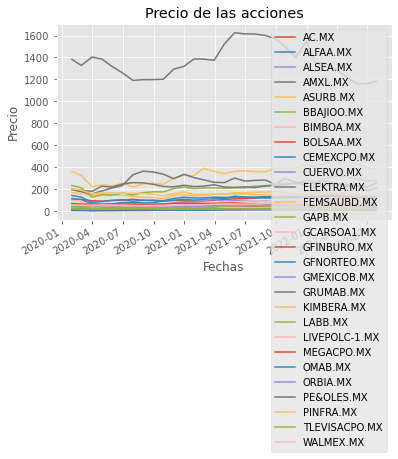

In [6]:
vs.graph_lin(dt.data_mensual,'Fechas','Precio','Precio de las acciones')

<font color= #6B6B6B> <font size = 3> 
Gracias a la obtención de todos estos datos, fue posible más adelante llevar a cabo todos los calculos necesarios para el cumplimiento del objetivo, tales como rendimientos, ratio de Sharpe, etc. 
</font>

# <font color= #6B6B6B> <font size = 6>4. Procesos </font>

<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> Inversión Pasiva </font>

<font color= #6B6B6B> <font size = 3> 
Para llevar a cabo la inversión pasiva se utilizarón los pesos iniciales dentro del archivo corresponidente a la primer fecha del periodo a analizar.
    Posteriormente, se calcularon las posiciones dividiendo el capital de un millon de pesos entre los pesos de cada acción y dividiendolos entre los precios de cierre iniciales, lo que nos da como resultado la cantidad de titulos a comprar de cada acción.
</font>

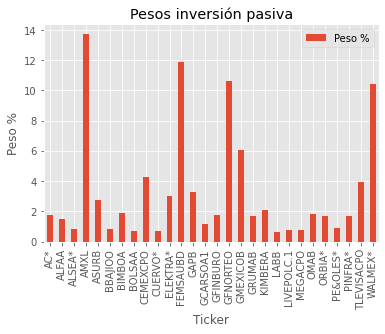

In [7]:
# plot pesos
vs.graph_tab(dt.df_weights1p,'Ticker','Peso %','Pesos inversión pasiva')

<font color= #6B6B6B> <font size = 3> 
Para calcular el capital al final de cada periodo, se multiplicó el número de títulos de cada acción por su precio de cierre al final de cada mes, de esta manera, podemos notar si se pierde o se gana dinero después de los movimientos en el precio, manteniendo siempre las mismas posiciones dentro del portafolio, sin olvidar, por supuesto, agregar el 'cash' restante despues de pagar las comisiones por la adquisisión de los títulos.
    Posteriormente, se calcularon tanto los rendimientos simples y acumulados con el objetivo analizar los resultados de esta estrategia.
</font>

In [8]:
# INV PASIVA
cap_pasiva = fun.inv_pasive(dt.data_mensual.iloc[13:], dt.pesos, dt.cash, dt.k, dt.dates[13:])
df_pasiva = fun.rend_pasiva(cap_pasiva)
df_pasiva

,capital,rend,rend_acum
Date,,,
2021-02-26,9.608454e+05,0.00,0.00
2021-03-31,9.882411e+05,2.85,2.85
2021-04-30,1.017709e+06,2.98,5.91
2021-05-31,1.083623e+06,6.48,12.78
2021-06-30,1.072689e+06,-1.01,11.64
2021-07-30,1.089855e+06,1.60,13.43
2021-08-31,1.145368e+06,5.09,19.20
2021-09-30,1.110312e+06,-3.06,15.55
2021-10-26,1.127028e+06,1.51,17.30


<font color= #6B6B6B> <font size = 3> 
Nota: Con el fín de poder hacer una comparación con la inversión activa, se tomaron únicamente los datos entre 26-02-2021 y 28-07-2022, pues en la inversión activa, se utilizarón los correspondientes al primer año para calcular el portafolio eficiente.
    </font>

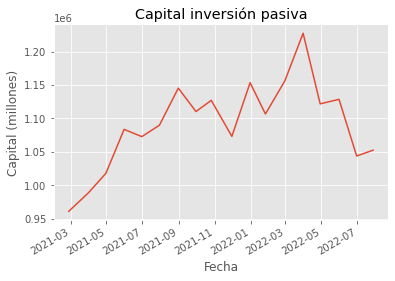

In [26]:
vs.graph_lin(cap_pasiva.iloc[:,0],'Fecha','Capital (millones)','Capital inversión pasiva')

## <font color= #6B6B6B> Inversión Activa </font>

<font color= #6B6B6B> <font size = 3> 
El llevar a cabo la inversión activa consistió en un reto mayor, para comenzar, se calcularon los pesos de un portafolio eficiente maximizando el ratio de Sharpe tomando en cuenta los datos del primer año.
    
Debido al método utilizado, este portafolio eficiente contiene solo algunos de los activos del portafolio inicial, y la ponderación de algunos de estos corresponde a la mayoría del portafolio en su totalidad. Para esta práctica, estos resultados no son incorrectos, sin embargo, podría aumentar el riesgo ocasionado por un movimiento brusco en los precios, desde este punto, podemos ver la importancia de tener condiciones claras y bien estructuradas al momento de manejar una inversión de este tipo. 
    </font>

In [27]:
# INV ACTIVA
# Pesos portafolio eficiente 
pesos_emv = fun.port_eficiente(dt.data_p, dt.Tickers)

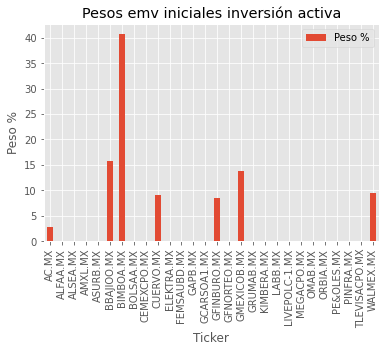

In [13]:
#plot portafolio eficiente
vs.graph_tab(pesos_emv,'Ticker','Peso %', 'Pesos emv iniciales inversión activa')

<font color= #6B6B6B> <font size = 3> 
Despues del primer movimiento en esta estrategia, que corresponde a la compra del portafolio eficiente, optenemo los siguientes datos:
    </font>

In [14]:
# Inversion activa 1
# Compra portafolio emv
test_active = fun.inv_active1(dt.data_mensual.iloc[13,],pesos_emv, dt.rend_mensual,dt.k)

print("Los títulos a comprar son: ")
import pandas as pd
df_pos_emv = pd.DataFrame(index = None,data={'Ticker':dt.Tickers,'titulos':test_active[0]})
df_pos_emv

Los títulos a comprar son: 


,Ticker,titulos
0,AC.MX,290.0
1,ALFAA.MX,0.0
2,ALSEA.MX,0.0
3,AMXL.MX,0.0
4,ASURB.MX,0.0
5,BBAJIOO.MX,6549.0
6,BIMBOA.MX,10334.0
7,BOLSAA.MX,0.0
8,CEMEXCPO.MX,0.0
9,CUERVO.MX,2095.0


In [15]:
print("La comisión por las compras iniciales es de: ",test_active[1])
print("El cash restante es de: ",test_active[3])

La comisión por las compras iniciales es de:  740.7549781250954
El cash restante es de:  21.412665870215278


<font color= #6B6B6B> <font size = 3> 
Como segundo paso de la estrategia, sigue el rebalanceo, que consistirá en disminuir o aumentar las posiciones según las siguientes condiciones:
       </font>
   
    - Aumentar la posición en 2.5%, si el precio del activo aumento mínimo en un 5%.
    - Y, disminuír la posición en 2.5%, si el precio del activo disminuyó mínimo en un 5%.
    
<font color= #6B6B6B> <font size = 3> 
    Verificando siempre que se puedan cubrir los gastos de compra y comisión. 
    Después de los movimientos necesarios, obtenemos la siguiente tabla que especifica el capital al final de cada periodo y los rendimientos simples y acumulado.
    </font>

In [16]:
# Inversion activa 2
# Rebalanceo
test_active2 = fun.inv_active2(dt.returns_month, dt.data_mensual,test_active[0],test_active[1],test_active[2],test_active[3],pesos_emv,dt.rend_mensual)
prices_act = dt.data_mensual.loc[:,dt.data_mensual.columns.isin(pesos_emv.index.to_list())]
#tablas 
df_activa = fun.rend_activa(test_active2[0])
df_activa

,Capital,rend,rend_acum
Date,,,
2021-02-26,9.987302e+05,0.00,0.00
2021-03-31,1.086010e+06,8.74,8.74
2021-04-30,1.078765e+06,-0.67,8.01
2021-05-31,1.138901e+06,5.57,14.03
2021-06-30,1.153399e+06,1.27,15.48
2021-07-30,1.163891e+06,0.91,16.53
2021-08-31,1.247969e+06,7.22,24.94
2021-09-30,1.296040e+06,3.85,29.75
2021-10-26,1.326833e+06,2.38,32.84


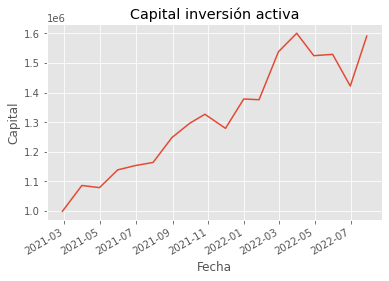

In [18]:
cap_act = test_active2[0] 
vs.graph_lin(cap_act.iloc[:,0],'Fecha','Capital','Capital inversión activa')

<font color= #6B6B6B> <font size = 3> 
Por último, nos interesa también observar los gastos de operación (en este caso únicamente comisiones), que causo cada uno de los movimientos realizados al mes, y la cantidad de titulos comprados al final de cada periodo.
    </font>

In [19]:
df_operaciones = fun.operaciones(prices_act, test_active2[1], test_active2[2])
df_operaciones

,titulos_comprados,comision,titulos_totales,comision_acum
Date,,,,
2021-02-26,26740.0,740.754978,26740.0,740.754978
2021-03-31,0.0,0.000000,26740.0,740.754978
2021-04-30,0.0,0.000000,26740.0,740.754978
2021-05-31,170.0,8.036813,26910.0,748.791791
2021-06-30,175.0,3.867600,27085.0,752.659391
2021-07-30,0.0,0.000000,27085.0,752.659391
2021-08-31,0.0,0.000000,27085.0,752.659391
2021-09-30,46.0,0.000000,27131.0,752.659391
2021-10-26,95.0,0.000000,27226.0,752.659391


## <font color= #6B6B6B> Medidas </font>

In [20]:
df_medidas = fun.medidas(df_activa,df_pasiva)
df_medidas

,medida,descripcion,inv_activa,inv_pasiva
0,rend_m,Rendimiento Promedio Mensual,2.752778,0.613889
1,rend_c,Rendimiento mensual acumulado,59.310000,9.540000
2,sharpe,Sharpe Ratio,0.513595,0.129974


<font color= #6B6B6B> <font size = 3> 
Para dar respuesta a los objetivos de este experimento y con motivo de comparar los resultados, se calcula lo siguiente:
    
    - El rendimiento promedio mensual, 
    - el rendimiento mensual acumulado 
    - y el Sharpe Ratio de cada una de las estrategias.
</font>

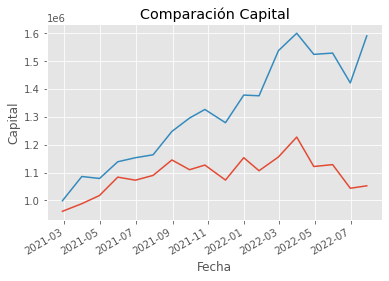

In [24]:
vs.graph_lin2(cap_pasiva.iloc[:,0],cap_act.iloc[:,0],'Fecha','Capital','Comparación Capital')
#añadir labels (azul es pasiva y rojo activa)

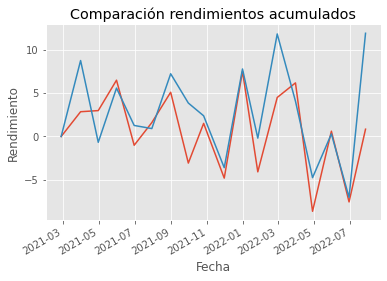

In [25]:
vs.graph_lin2(cap_pasiva.iloc[:,1],cap_act.iloc[:,1],'Fecha','Rendimiento','Comparación rendimientos acumulados')
#añadir labels (azul es pasiva y rojo activa)

# <font color= #6B6B6B> <font size = 6>5. Conclusiones </font>

<hr style="border:0.02in solid gray"> </hr>

<font color= #6B6B6B> <font size = 3> 
Debido al perdiodo en que se realizó el experimento, se puede apreciar que la inversión activa resulta mucho más rentable, sin embargo, se espera que a la larga y contemplando otros costos (normalmente altos) de manejo de inversiones, este tipo de inversión baje su rentabilidad.
Además, en el ejercicio real, invertir en un portafolio como el que se obtuvo con la maximización del Sharpe, incurriría en un riesgo extremadamente alto, pues la diversificación es muy baja.
</font>